# Erzeugen von Zufallszahlen

## Normalverteilte Zufallszahlen

In [1]:
import numpy

In [2]:
!pip install numpy

In [4]:
numpy.random.seed( 42 )

In [23]:
A = numpy.random.normal( loc = 0.0, scale = 1.0, size = 10000 )

In [24]:
A

array([-1.16867804,  1.14282281,  0.75193303, ..., -0.2812036 ,
        0.12341913,  0.444592  ])

In [21]:
A.min()

-2.6197451040897444

In [22]:
A.max()

2.463242112485286

In [25]:
A.shape

(10000,)

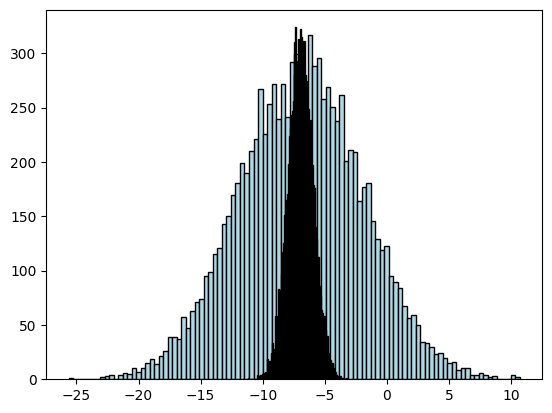

In [33]:
A = numpy.random.normal( loc = -7.0, scale = 1.0, size = 10000 )
B = numpy.random.normal( loc = -7.0, scale = 5.0, size = 10000 )

import matplotlib.pyplot as plt
plt.hist(B, bins=100, color="lightblue",  edgecolor="black")
plt.hist(A, bins=100, color="lightgreen", edgecolor="black")
plt.show()

In [27]:
A[:5]

array([-1.16867804,  1.14282281,  0.75193303,  0.79103195, -0.90938745])

## Gleichverteilte Zufallszahlen

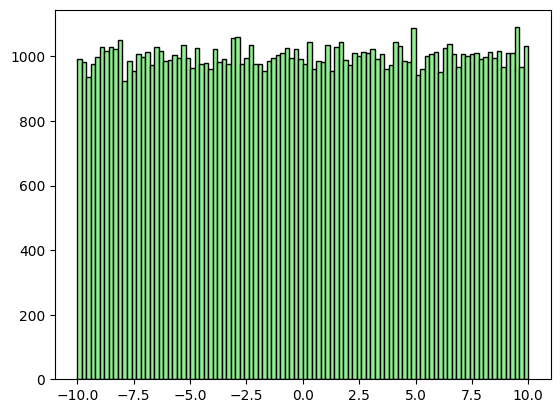

In [41]:
C = numpy.random.uniform(low = -10, high = +10, size = 100000)

import matplotlib.pyplot as plt
plt.hist(C, bins=100, color="lightgreen", edgecolor="black")
plt.show()

# Simulation eines Abstandssensors mit linearer Kennlinie

In [86]:
numpy.random.seed( 42 )

class absstandssensor_lineare_kennlinie:

    def __init__(self):
        self.bias = numpy.random.uniform(low=-10, high=+10)
        self.noise = numpy.random.uniform(low=1, high=5)

    def sample(self, abstand):
        sensorwert = abstand + numpy.random.normal(loc=self.bias,
                                                   scale=self.noise)
        return sensorwert

    def kennlinie(self):
        abstaende   = []
        sensorwerte = []
        for abstand in range(0,101):
            sensorwert = self.sample( abstand )
            abstaende.append( abstand )
            sensorwerte.append( sensorwert )

        return numpy.array( abstaende ), numpy.array( sensorwerte )

    def zeige_kennlinie(self):
        a,s = self.kennlinie()
        plt.plot(a,s)
        plt.xlabel("Tatsächlicher Abstand (Ground Truth) [cm]")
        plt.ylabel("Sensorwert")
        plt.show()


a1 = absstandssensor_lineare_kennlinie()

In [87]:
a1.bias

-2.50919762305275

In [88]:
a1.noise

4.802857225639665

In [92]:
a1.sample(10)

9.431400954124854

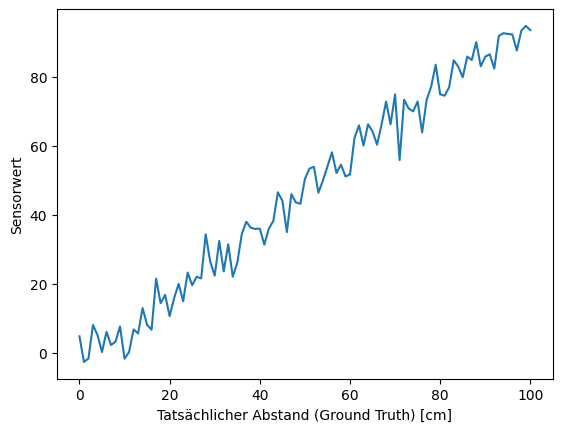

In [90]:
a1.zeige_kennlinie()

In [77]:
a1.kennlinie()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([  9.49802228,   0.17408153,  10.50451633,   1.27765961,
         -3.47645915,  10.78366216,   2.61294233,   8.19929635,
         19.86854205,  18.0498306 ,   9.10971006,   9.79881501,
         18.8808616 ,  14.84898415,  19.30536201,  22.64634722,
         20.46407952,  15.43274535,  25.23921705,  24.69098689,
         19.98533823,  22.26420202,  23.70152035,  36.69564495,
         26.27305734,  28.3177514 ,  25.85751

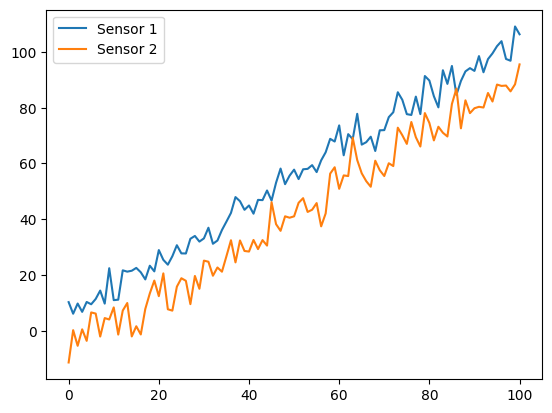

In [94]:
s1 = absstandssensor_lineare_kennlinie()
s2 = absstandssensor_lineare_kennlinie()

a1,sw1 = s1.kennlinie()
a2,sw2 = s2.kennlinie()
plt.plot(a1,sw1, label = "Sensor 1")
plt.plot(a2,sw2, label = "Sensor 2")
plt.legend()
plt.show()

In [95]:
s1.bias

5.017421355829947

In [96]:
s2.bias

-7.937522623281348

In [97]:
s1.noise

4.018171496338729

In [98]:
s2.noise

4.610211626718266

# Fehlerfunktion für Fusionsergebnisse

In [99]:
gt          = numpy.array( [1,   2,   3,   4,   5]   )
sensorwerte = numpy.array( [0.5, 2.5, 2.5, 4.5, 5.5] ) 

In [100]:
type(gt)

numpy.ndarray

In [101]:
type(sensorwerte)

numpy.ndarray

In [105]:
# Mean Absolute Error (MAE)
numpy.mean(abs(gt - sensorwerte))

0.5

In [106]:
def MAE_metrics(gt, sensorwerte):
    MAE = numpy.mean(abs(gt - sensorwerte))
    return MAE

In [107]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error( a1, sw1 )

5.374999521358046

In [108]:
MAE_metrics( a1, sw1 )

5.374999521358046

# Erster Versuch eines Fusionsansatzes (Mittelwertbildung)

## Fehler bei Verwendung nur eines Sensors

In [109]:
s1 = absstandssensor_lineare_kennlinie()
s2 = absstandssensor_lineare_kennlinie()

a1,sw1 = s1.kennlinie()
a2,sw2 = s2.kennlinie()

In [110]:
MAE_metrics(a1, sw1)

6.860944763201495

In [111]:
MAE_metrics(a2, sw2)

8.408003283077605

## Sensordatenfusion über einfache Mittelwertbildung

In [123]:
sw_fusioniert = (sw1 + sw2) / 2
sw_fusioniert[:5]

array([-1.30381357,  6.03763913,  3.95607606,  7.62163667,  2.77545039])

In [124]:
MAE_metrics(a1, sw_fusioniert)

2.1463428699089113

In [125]:
s1.bias

-6.582248252198683

In [126]:
s2.bias

8.587519782551716